In [5]:
import librosa
import numpy as np
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
hop = int(sr*0.025)
n_fft = 2048
print(f'fft window = {n_fft/sr*1000:.2f}ms -- hop = {hop/sr*1000:.2f}ms')
print(sr)
D = np.abs(librosa.stft(y, hop_length=hop, n_fft=n_fft))
# return D:np.ndarray [shape=(1 + n_fft/2, n_frames), dtype=dtype] 201 = 5/0.025 +1
D.shape

fft window = 92.88ms -- hop = 24.99ms
22050


(1025, 201)

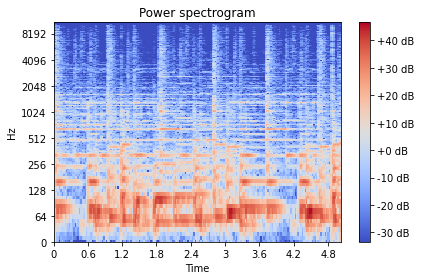

In [8]:
import matplotlib.pyplot as plt
from librosa import display
from IPython.display import Audio
display.specshow(librosa.amplitude_to_db(D), y_axis='log', x_axis='time', sr=sr, hop_length=hop)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
Audio(data=y, rate=sr)

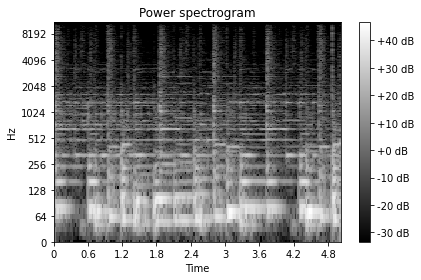

In [9]:
display.specshow(librosa.amplitude_to_db(D), y_axis='log', x_axis='time', cmap='gray', sr=sr, hop_length=hop)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
Audio(data=y, rate=sr)

In [10]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
D = librosa.stft(y)
y_hat = librosa.istft(D)
Audio(data=y_hat, rate=sr)

In [11]:

n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft)
y_out = librosa.istft(D, length=n)
Audio(data=y_out, rate=sr)

In [17]:
librosa.feature.mfcc(y=y, sr=sr)

array([[-1.62159164e+02, -1.02731514e+02, -8.68847122e+01, ...,
        -2.80821259e+02, -2.44131592e+02, -2.13369202e+02],
       [ 1.18974670e+02,  1.00430084e+02,  9.05269012e+01, ...,
         1.93494324e+02,  1.58097443e+02,  1.35329285e+02],
       [ 6.98852205e+00,  6.20629609e-01,  8.05861759e+00, ...,
         3.49733276e+01,  3.17237148e+01,  3.39902458e+01],
       ...,
       [ 7.30405617e+00,  4.70762062e+00,  1.31141710e+00, ...,
         1.29032946e+01,  7.42025709e+00,  4.86201286e+00],
       [ 1.31991043e+01,  1.25032177e+01,  7.71923923e+00, ...,
         5.50620413e+00,  2.68712902e+00,  1.56248808e-01],
       [ 2.46421099e+00,  2.64739799e+00,  4.44236803e+00, ...,
         1.85265970e+00,  4.44370604e+00,  7.84341574e+00]], dtype=float32)

In [18]:
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

array([[-1.6276381e+02, -8.9025200e+01, -1.4089229e+02, ...,
        -1.0782481e+02, -2.5037590e+02, -2.3931360e+02],
       [ 1.2749146e+02,  9.5317184e+01,  1.0190823e+02, ...,
         1.1523335e+02,  2.2238391e+02,  1.7497104e+02],
       [ 1.1388008e+01,  6.1552348e+00,  1.2661100e+01, ...,
         4.5570557e+01,  4.5848171e+01,  3.9854446e+01],
       ...,
       [ 3.4622142e+00,  4.0315661e+00, -5.6938696e-01, ...,
        -6.6768336e+00, -1.1825347e-01,  1.4854662e+00],
       [ 9.5686173e-01,  1.0692384e+00, -6.8650713e+00, ...,
        -9.5978565e+00, -1.6105204e+00, -6.7159085e+00],
       [ 8.4571533e+00,  3.5823300e+00, -1.1561361e-01, ...,
        -3.0180669e+00, -1.4558304e+01, -6.9907751e+00]], dtype=float32)

In [19]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc.shape

(20, 216)

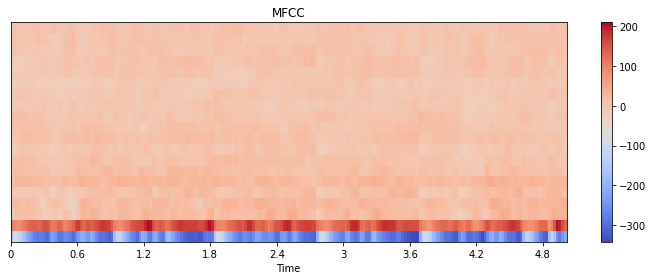

In [20]:
import matplotlib.pyplot as plt
from librosa import display
plt.figure(figsize=(10, 4))
display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [21]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../.idea/
	../Exercise 1/Data.zip
	../Week 2/.ipynb_checkpoints/
	./

nothing added to commit but untracked files present (use "git add" to track)
